# Import Library

In [22]:
#import
import pandas as pd
import numpy as np

# Normalisasi
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Import Library Linear dan Nonliner

# Linear
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Non Linear 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import NuSVR, SVR

#spliting ML
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score,make_scorer
from sklearn.metrics import confusion_matrix
import seaborn as sns

#warning
import warnings
warnings.filterwarnings("ignore")

#
import pickle
import joblib

# Load Dataset

In [2]:
df = pd.read_csv("data_training_testing.csv", encoding="utf-8")
df

,Molecular_weight MW (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Electronegativity (eV),ΔN_Fe,IE EXP (%)
0,192.12,2.79,-1.64,0.51,63.24,16.02,-7.116,-3.929,5.5225,0.463602,83.78
1,240.34,9.30,2.98,-2.80,115.04,19.16,-7.010,-3.358,5.1840,0.497262,93.00
2,252.34,6.80,0.40,-1.35,82.25,10.28,-6.967,-2.652,4.8095,0.507648,97.70
3,128.08,4.00,-1.47,-1.50,37.30,5.34,-6.816,-1.070,3.9430,0.532022,92.00
4,238.16,7.20,-0.47,-2.80,75.27,22.62,-6.720,-2.502,4.6110,0.566382,95.00
...,...,...,...,...,...,...,...,...,...,...,...
65,180.16,3.50,1.80,-2.10,182.00,43.65,-5.693,-3.454,4.5735,1.083743,95.90
66,347.40,3.60,0.60,-3.10,52.19,54.92,-4.838,-1.303,3.0705,1.111598,93.09
67,249.29,8.40,0.35,-2.70,117.78,66.06,-4.905,-2.329,3.6170,1.313276,94.00
68,137.14,1.82,-0.70,0.01,220.15,86.46,-4.855,-2.808,3.8315,1.547875,94.70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Molecular_weight MW (g/mol)  70 non-null     float64
 1   pKa                          70 non-null     float64
 2   Log P                        70 non-null     float64
 3   Log S                        70 non-null     float64
 4   Polar Surface Area (Å2)      70 non-null     float64
 5   Polarizability (Å3)          70 non-null     float64
 6   HOMO (eV)                    70 non-null     float64
 7   LUMO (eV)                    70 non-null     float64
 8   Electronegativity (eV)       70 non-null     float64
 9    ΔN_Fe                       70 non-null     float64
 10  IE EXP (%)                   70 non-null     float64
dtypes: float64(11)
memory usage: 6.1 KB


# Preprocesing Data

In [4]:
df[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']] = df[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']].replace(',', '.', regex=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Molecular_weight MW (g/mol)  70 non-null     float64
 1   pKa                          70 non-null     float64
 2   Log P                        70 non-null     float64
 3   Log S                        70 non-null     float64
 4   Polar Surface Area (Å2)      70 non-null     float64
 5   Polarizability (Å3)          70 non-null     float64
 6   HOMO (eV)                    70 non-null     float64
 7   LUMO (eV)                    70 non-null     float64
 8   Electronegativity (eV)       70 non-null     float64
 9    ΔN_Fe                       70 non-null     float64
 10  IE EXP (%)                   70 non-null     float64
dtypes: float64(11)
memory usage: 6.1 KB


In [6]:
df_model = df[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']] = df[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']]

In [7]:
# df_model.head()
df_model

,Molecular_weight MW (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Electronegativity (eV),ΔN_Fe,IE EXP (%)
0,192.12,2.79,-1.64,0.51,63.24,16.02,-7.116,-3.929,5.5225,0.463602,83.78
1,240.34,9.30,2.98,-2.80,115.04,19.16,-7.010,-3.358,5.1840,0.497262,93.00
2,252.34,6.80,0.40,-1.35,82.25,10.28,-6.967,-2.652,4.8095,0.507648,97.70
3,128.08,4.00,-1.47,-1.50,37.30,5.34,-6.816,-1.070,3.9430,0.532022,92.00
4,238.16,7.20,-0.47,-2.80,75.27,22.62,-6.720,-2.502,4.6110,0.566382,95.00
...,...,...,...,...,...,...,...,...,...,...,...
65,180.16,3.50,1.80,-2.10,182.00,43.65,-5.693,-3.454,4.5735,1.083743,95.90
66,347.40,3.60,0.60,-3.10,52.19,54.92,-4.838,-1.303,3.0705,1.111598,93.09
67,249.29,8.40,0.35,-2.70,117.78,66.06,-4.905,-2.329,3.6170,1.313276,94.00
68,137.14,1.82,-0.70,0.01,220.15,86.46,-4.855,-2.808,3.8315,1.547875,94.70


In [8]:
df_model.isna().sum()

Molecular_weight MW (g/mol)    0
pKa                            0
Log P                          0
Log S                          0
Polar Surface Area (Å2)        0
Polarizability (Å3)            0
HOMO (eV)                      0
LUMO (eV)                      0
Electronegativity (eV)         0
 ΔN_Fe                         0
IE EXP (%)                     0
dtype: int64

In [9]:
df_model.dropna(inplace=True)

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Molecular_weight MW (g/mol)  70 non-null     float64
 1   pKa                          70 non-null     float64
 2   Log P                        70 non-null     float64
 3   Log S                        70 non-null     float64
 4   Polar Surface Area (Å2)      70 non-null     float64
 5   Polarizability (Å3)          70 non-null     float64
 6   HOMO (eV)                    70 non-null     float64
 7   LUMO (eV)                    70 non-null     float64
 8   Electronegativity (eV)       70 non-null     float64
 9    ΔN_Fe                       70 non-null     float64
 10  IE EXP (%)                   70 non-null     float64
dtypes: float64(11)
memory usage: 6.1 KB


In [11]:
df_model["Molecular_weight MW (g/mol)"] = df_model["Molecular_weight MW (g/mol)"].astype(float)
df_model["Log P"] = df_model["Log P"].astype(float)
df_model["Log S"] = df_model["Log S"].astype(float)
df_model["Polar Surface Area (Å2)"] = df_model["Polar Surface Area (Å2)"].astype(float)
df_model["Polarizability (Å3)"] = df_model["Polarizability (Å3)"].astype(float)

In [13]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Molecular_weight MW (g/mol)  70 non-null     float64
 1   pKa                          70 non-null     float64
 2   Log P                        70 non-null     float64
 3   Log S                        70 non-null     float64
 4   Polar Surface Area (Å2)      70 non-null     float64
 5   Polarizability (Å3)          70 non-null     float64
 6   HOMO (eV)                    70 non-null     float64
 7   LUMO (eV)                    70 non-null     float64
 8   Electronegativity (eV)       70 non-null     float64
 9    ΔN_Fe                       70 non-null     float64
 10  IE EXP (%)                   70 non-null     float64
dtypes: float64(11)
memory usage: 6.1 KB


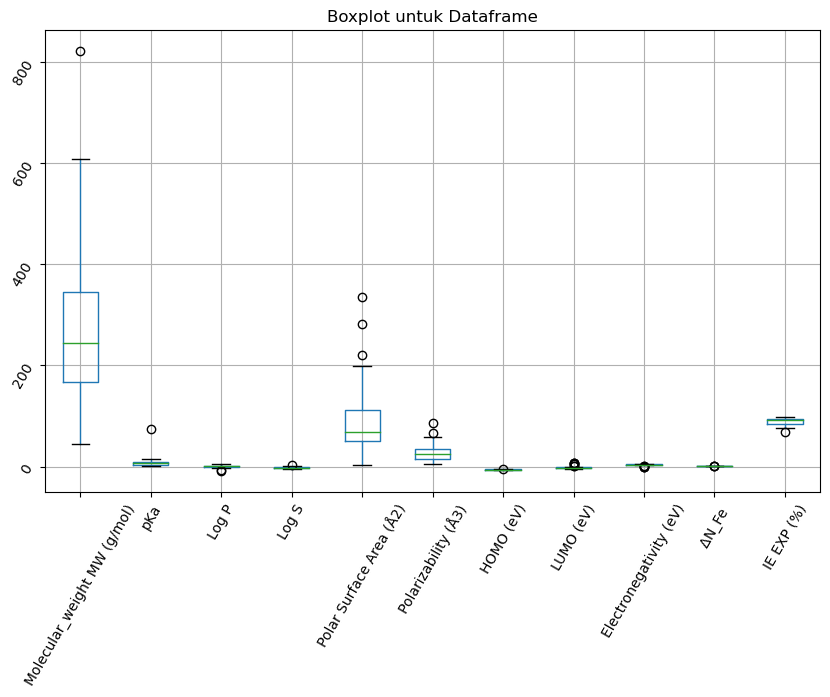

In [19]:
import matplotlib.pyplot as plt

# Visualisasi dengan boxplot
plt.figure(figsize=(10, 6))
df_model.boxplot()
plt.title('Boxplot untuk Dataframe')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

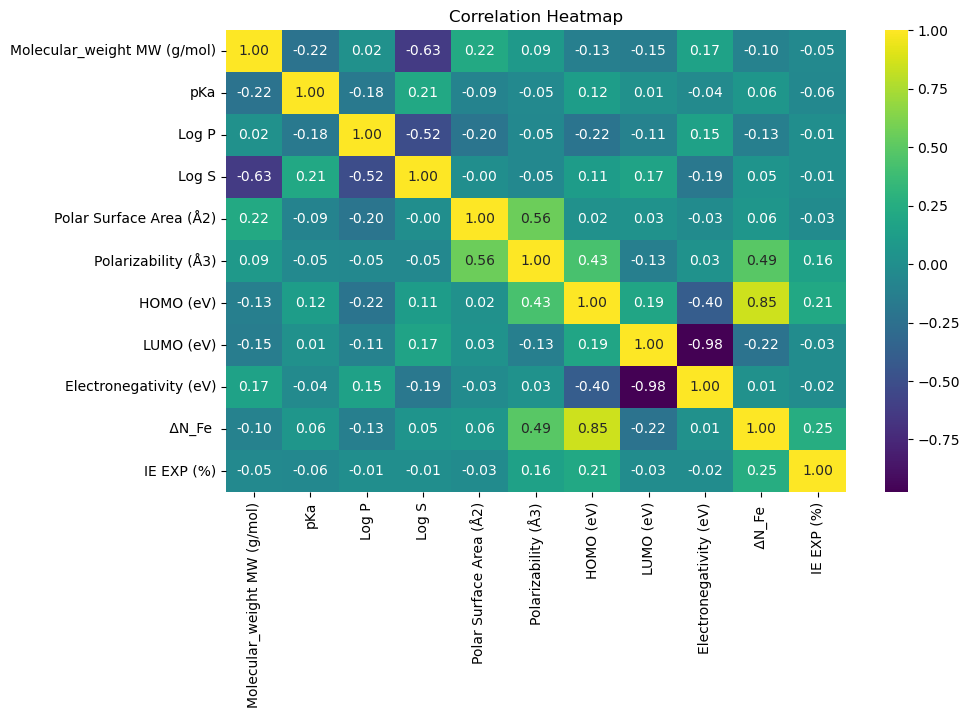

In [28]:
matriks = df_model.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriks, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
models = {
    #linier
    "Linear Regression": LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "Elastic Net" : ElasticNet(),
    #nonlinier
    "XGB Regressor" : XGBRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(),
    "Light GBM Regressor" : LGBMRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "NuSVR" : NuSVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest Regressor":RandomForestRegressor(),
}

# Pemisah

In [16]:
# Membuat objek RobustScaler
scaler = RobustScaler()

# Melakukan fit dan transform pada dataset
cek_data = scaler.fit_transform(df_model['IE EXP (%)'].values.reshape(-1,1)).flatten()

# Menampilkan nilai center dan scale
print("Center:", scaler.center_)
print("Scale:", scaler.scale_)

Center: [92.]
Scale: [9.2925]


In [17]:
# Membuat objek StandardScaler()
scaler = StandardScaler()

# Melakukan fit dan transform pada dataset
cek_data = scaler.fit_transform(df_model['IE EXP (%)'].values.reshape(-1,1)).flatten()

# Menampilkan nilai mean dan std
print("Mean:", scaler.mean_)
print("Standard Deviation:", np.sqrt(scaler.var_))

Mean: [89.69491429]
Standard Deviation: [6.52398875]
